# Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

# Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

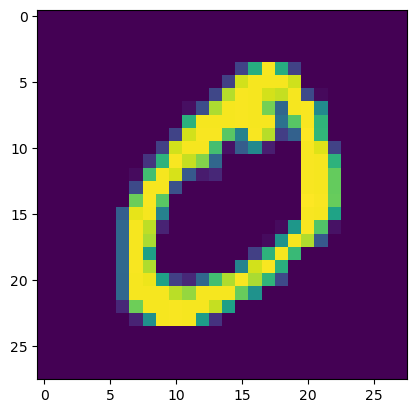

In [3]:
plt.imshow(x_train[1])

In [4]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

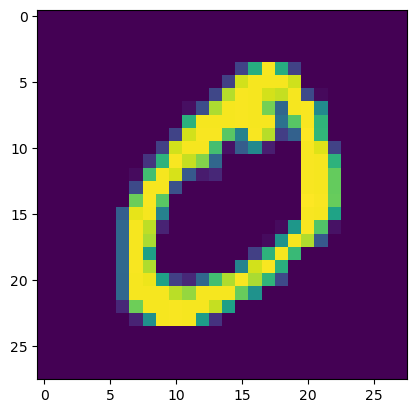

In [5]:
plt.imshow(x_train[1])

In [6]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

# Add Noise to the Image

In [7]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [8]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Exploratory Data Analysis

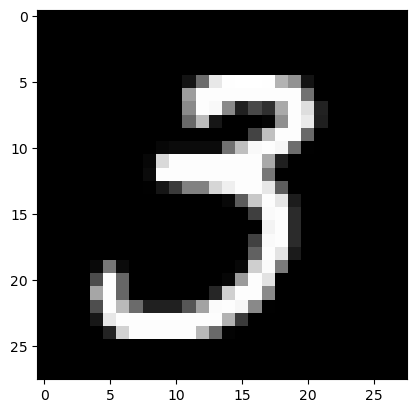

In [9]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

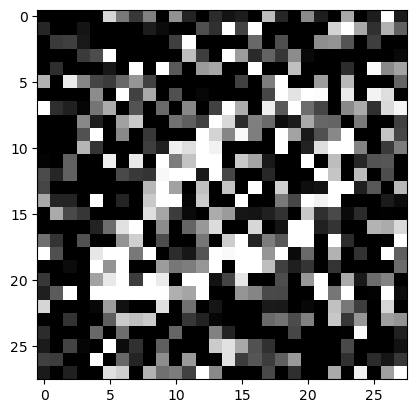

In [10]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

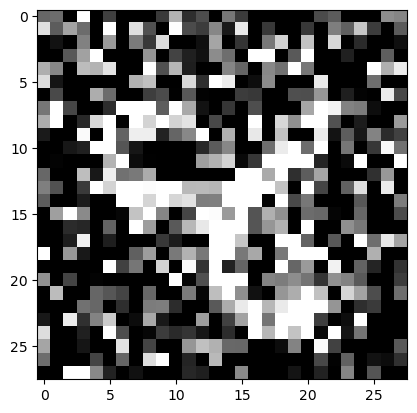

In [11]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

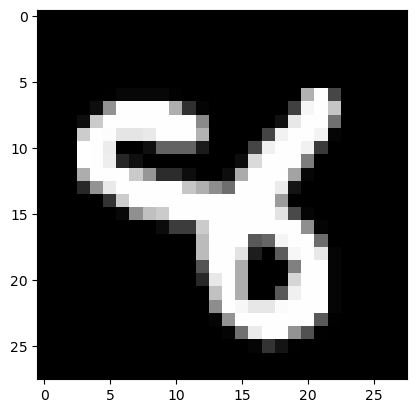

In [12]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

# Model Creation

In [13]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [14]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 135s 562ms/step - loss: 0.2511 - val_loss: 0.1550
Epoch 2/20
235/235 [==============================] - 131s 556ms/step - loss: 0.1468 - val_loss: 0.1408
Epoch 3/20
235/235 [==============================] - 132s 560ms/step - loss: 0.1376 - val_loss: 0.1332
Epoch 4/20
235/235 [==============================] - 131s 557ms/step - loss: 0.1318 - val_loss: 0.1278
Epoch 5/20
235/235 [==============================] - 131s 559ms/step - loss: 0.1276 - val_loss: 0.1247
Epoch 6/20
235/235 [==============================] - 132s 561ms/step - loss: 0.1250 - val_loss: 0.1226
Epoch 7/20
235/235 [==============================] - 131s 559ms/step - loss: 0.1232 - val_loss: 0.1212
Epoch 8/20
235/235 [==============================] - 132s 560ms/step - loss: 0.1219 - val_loss: 0.1200
Epoch 9/20
235/235 [==============================] - 132s 562ms/step - loss: 0.1207 - val_loss: 0.1190
Epoch 10/20
235/235 [==============================] - 132s 561m

# Visualize the Results

In [15]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 10s 30ms/step


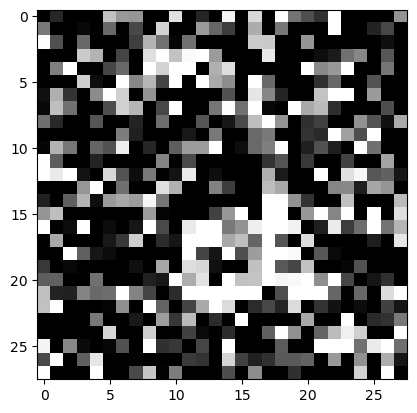

In [16]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

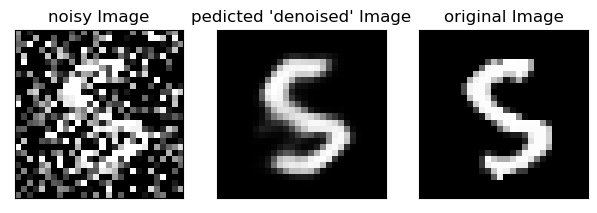

In [36]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display noisy image
ax = plt.subplot(1, 4, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
plt.title("noisy Image")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 4, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
plt.title("pedicted 'denoised' Image")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display original image
ax = plt.subplot(1, 4, 3)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
plt.title("original Image")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('result3.png')
plt.show()

In [37]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Assuming img1 and img2 are the two images for comparison
psnr_value = peak_signal_noise_ratio(x_test[index], pred[index])
ssim_value = structural_similarity(x_test[index], pred[index], multichannel=True)

print("PSNR:", psnr_value)
print("SSIM:", ssim_value*100)

PSNR: 19.655044484966254
SSIM: 85.02119183540344


C:\Users\mahmo\AppData\Local\Temp\ipykernel_22312\3831196965.py:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = structural_similarity(x_test[index], pred[index], multichannel=True)


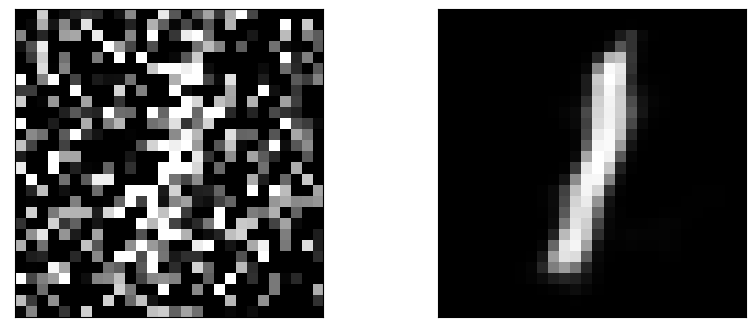

In [18]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

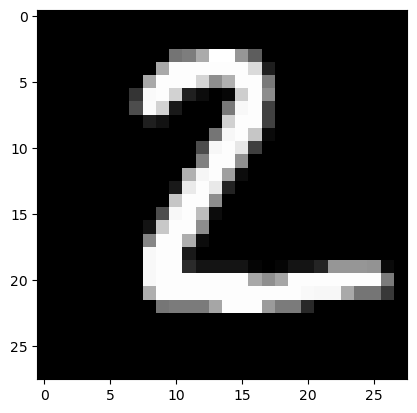

In [19]:
plt.imshow(x_test[1].reshape(28,28))